In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
np.random.seed(0)

# 2.a.1. Draw Exercise Boundary for American Put Option

In [19]:
# basic 
T = 1
S0 = 10
mu = 0.05
sigma = 0.2
r = 0.02
Ntrials = 5000
# Ntrials = 100
K = 10


In [20]:
timeStep = T / Ntrials
u = np.exp(r * timeStep + sigma * np.sqrt(timeStep))  # one step under P 
d = np.exp(r * timeStep - sigma * np.sqrt(timeStep))  # one step under P
# risk neutral probability
Qu = 0.5 * (1 - 0.5 * sigma * np.sqrt(timeStep))  # see answers in Q1
Qd = 1 - Qu

In [21]:
# asset tree
asset_tree = np.full((Ntrials + 1, Ntrials + 1), np.nan)
# initiate with current price
asset_tree[0, 0] = S0
for i in range(1, Ntrials + 1):
    # we only use the top diagonal of the tree
    asset_tree[0:i, i] = asset_tree[0:i, i - 1] * u
    asset_tree[i, i] = asset_tree[i - 1, i - 1] * d

In [22]:
# calculate the option value 

In [23]:
Q_option_tree = np.full((Ntrials + 1, Ntrials + 1), np.nan)
Q_option_tree[:, -1] = np.maximum(K - asset_tree[:, -1], 0)
for i in range(Ntrials - 1, -1, -1):
    previous_numeraire = np.exp(r * (i + 1) / Ntrials)
    current_numeraire = np.exp(r * i / Ntrials)
    Q_option_tree[0:i + 1, i] = (Qu * Q_option_tree[0:i + 1, i + 1] / previous_numeraire + Qd * Q_option_tree[1:i + 2,
                                                                                                i + 1] / previous_numeraire) * current_numeraire
    # because this is an american option, we consider the early exercise possibility
    Q_option_tree[0:i + 1, i] = np.maximum(K - asset_tree[0:i + 1, i], Q_option_tree[0:i + 1, i])


In [24]:
def np_groupby(data, key):
    unique_keys = np.unique(key)
    grouped_data = {unique_key: [] for unique_key in unique_keys}
    for i in range(len(data)):
        grouped_data[key[i]].append(data[i])
    return grouped_data


grouped_timestamp = np_groupby(*np.where((K - asset_tree - Q_option_tree) == 0))

In [25]:
grouped_timestamp = np.vstack([[min(item) for item in grouped_timestamp.values()], list(grouped_timestamp.keys())])

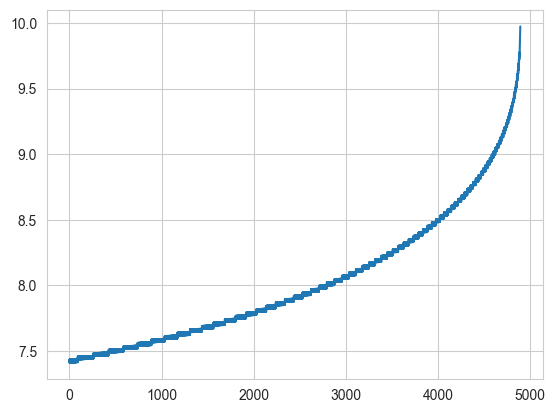

In [42]:
plt.plot(asset_tree[grouped_timestamp[0], grouped_timestamp[1]])

In [ ]:
Q_option_tree

In [30]:
grouped_timestamp[:,-1]

array([2504, 5000], dtype=int64)

## using B as a numeraire 

In [ ]:
# one step 

# Path simulation

In [2]:
T = 1
S0 = 10
K = 10
mu = 0.05
sigma = 0.2
r = 0.02
N = 5000


In [3]:
def sample_path(S0, T, N, r, mu, sigma):
    timeStep = T / N
    prob_epsilon_up = 0.5 * (1 + ((mu - r) - 0.5 * sigma ** 2) / sigma * np.sqrt(timeStep))
    Ntrials = 10_000
    total_path = np.empty((Ntrials, N + 1))
    total_path[:, 0] = S0
    for i in range(N):
        U = np.random.rand(Ntrials)
        epsilon = 1 * (U < prob_epsilon_up) + (-1) * (U >= prob_epsilon_up)  # realization of epsilon
        total_path[:, i + 1] = total_path[:, i] * np.exp(r * timeStep + sigma * np.sqrt(timeStep) * epsilon)
    return total_path

In [ ]:
total_path = sample_path(S0, K, T, N, r, mu, sigma)

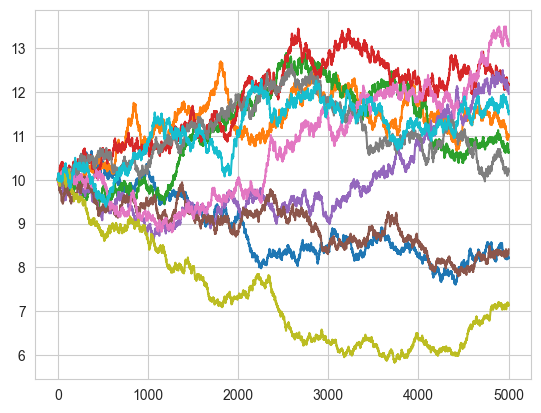

In [6]:
for i in range(10):
    plt.plot(total_path[i, :].T)